In [1]:
setwd("C:/Users/Zoe/Desktop/Disertatie/Coduri")

In [2]:
library(readxl)
library(forecast)
library(lmtest)
library(tseries)
library(ggcorrplot)
library(MASS)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: ggplot2



In [3]:
Disertatie <- read_excel("DisertatieM1.xlsx")

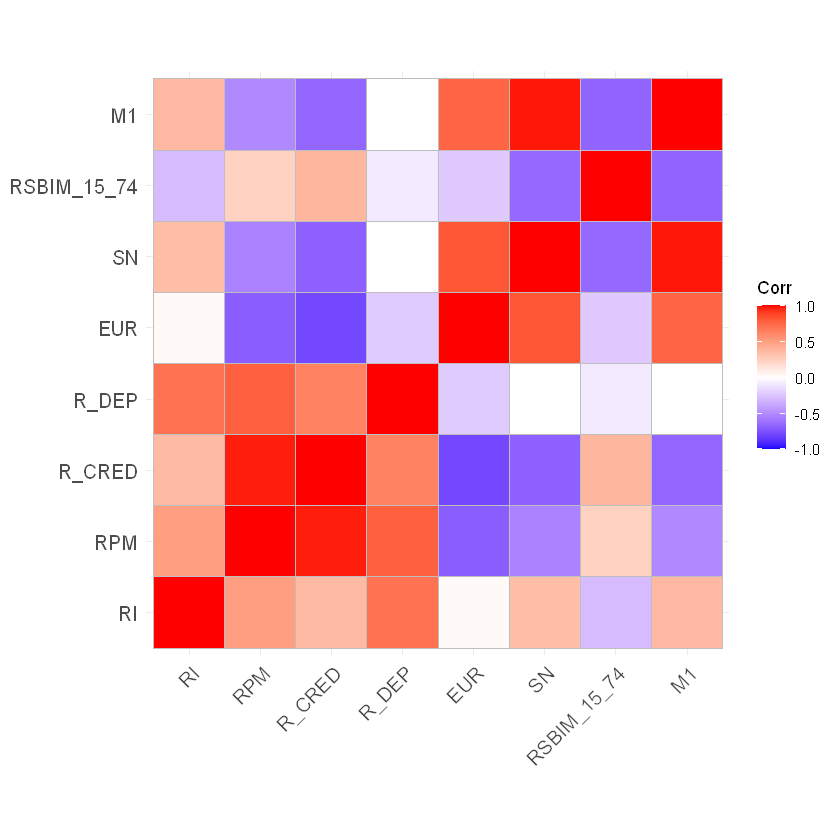

In [4]:
matrice_cor = cor(Disertatie[-1])
ggcorrplot(matrice_cor)


In [5]:
train_data <- Disertatie[1:(nrow(Disertatie)-7), ]
test_data <- Disertatie[(nrow(Disertatie)-6):(nrow(Disertatie)), ]

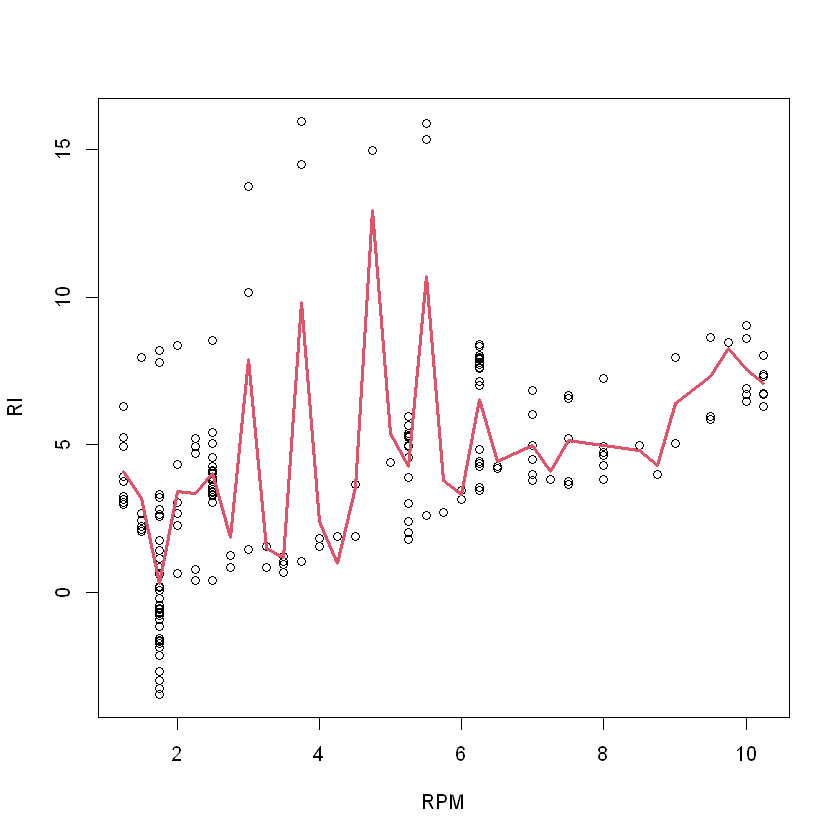

In [6]:
plot(RI~RPM,data=train_data, xlab="RPM",ylab="RI")
lines(smooth.spline(train_data$RPM,train_data$RI),col=2,lwd=3)

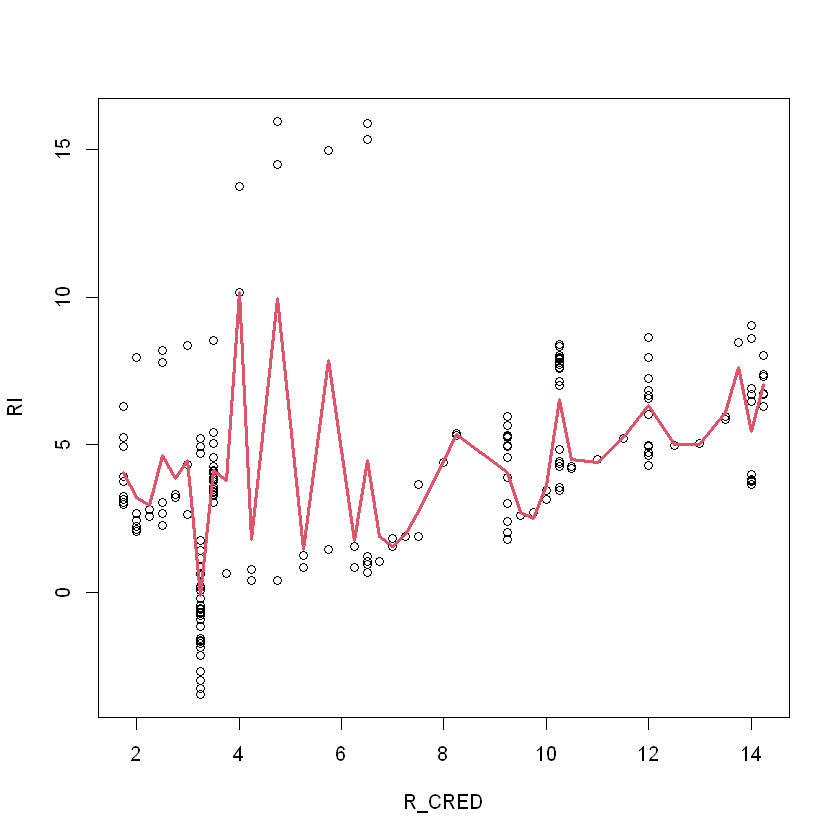

In [7]:
plot(RI~R_CRED,data=train_data, xlab="R_CRED",ylab="RI")
lines(smooth.spline(train_data$R_CRED,train_data$RI),col=2,lwd=3)

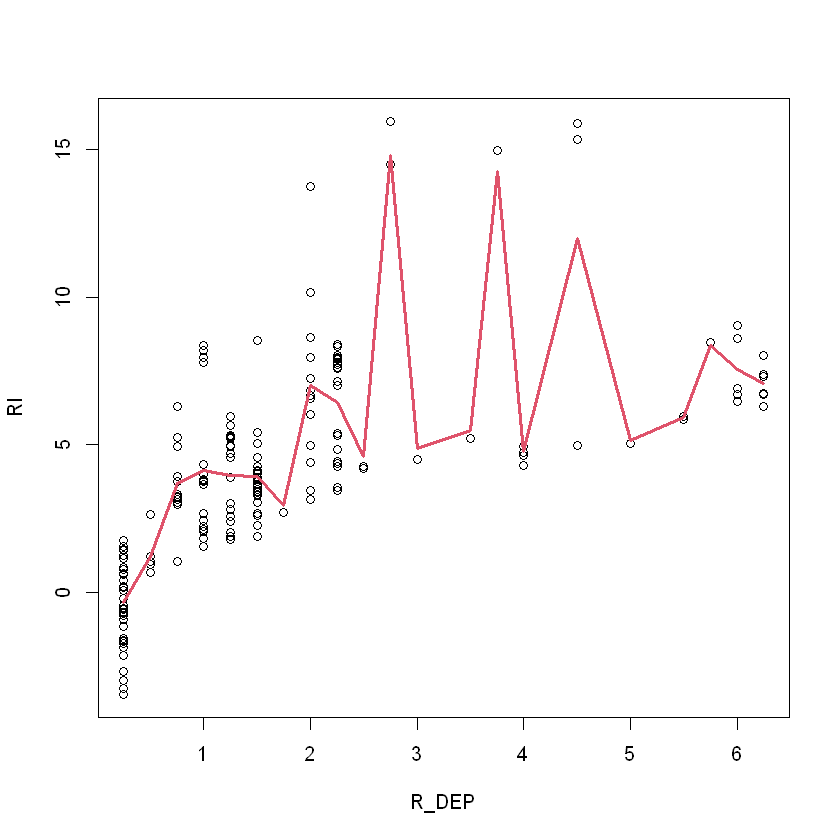

In [8]:
plot(RI~R_DEP,data=train_data, xlab="R_DEP",ylab="RI")
lines(smooth.spline(train_data$R_DEP,train_data$RI),col=2,lwd=3)

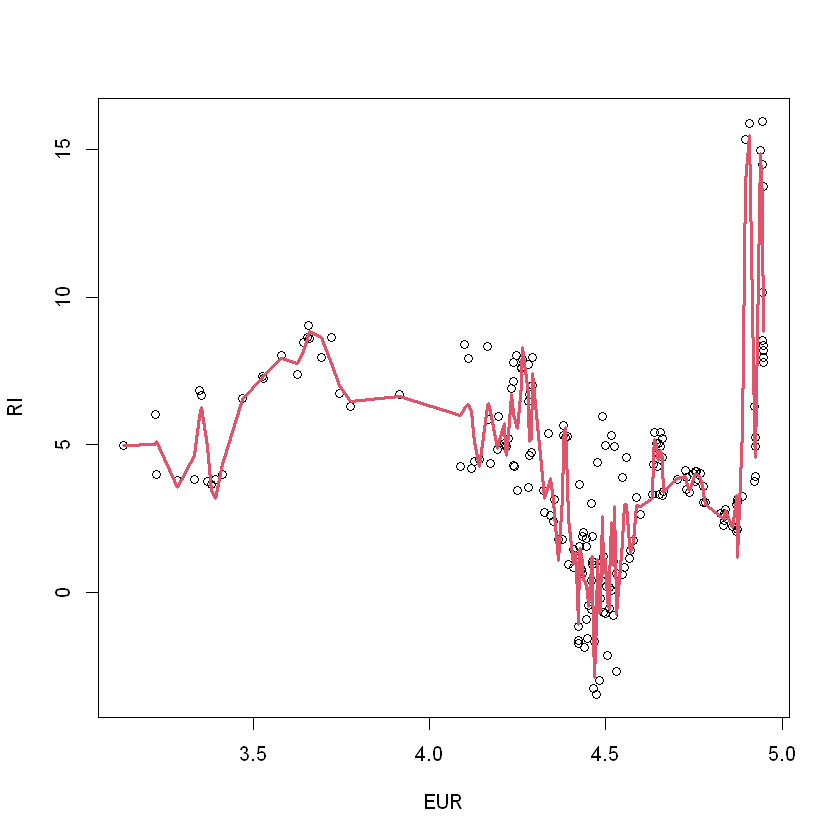

In [9]:
plot(RI~EUR,data=train_data, xlab="EUR",ylab="RI")
lines(smooth.spline(train_data$EUR,train_data$RI),col=2,lwd=3)

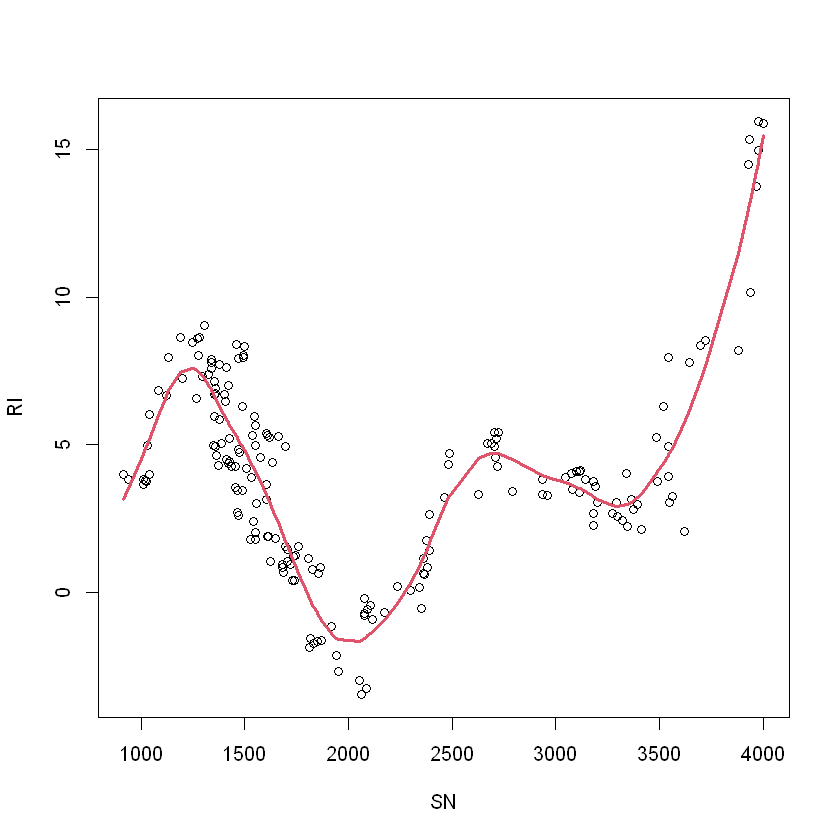

In [10]:
plot(RI~SN,data=train_data, xlab="SN",ylab="RI")
lines(smooth.spline(train_data$SN,train_data$RI),col=2,lwd=3)

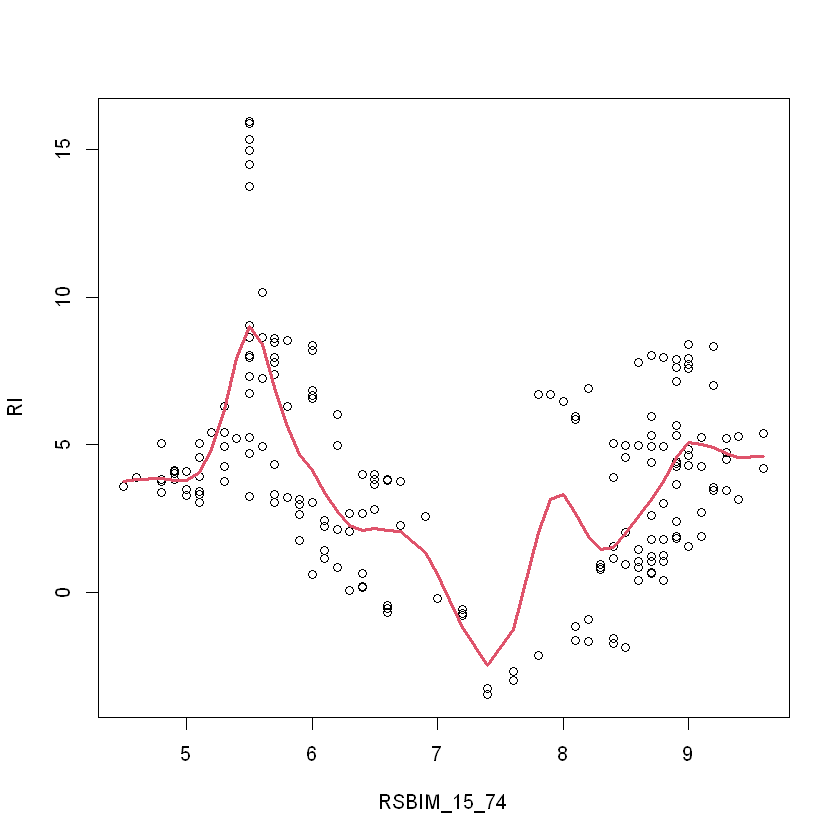

In [11]:

plot(RI~RSBIM_15_74,data=train_data, xlab="RSBIM_15_74",ylab="RI")
lines(smooth.spline(train_data$RSBIM_15_74,train_data$RI),col=2,lwd=3)

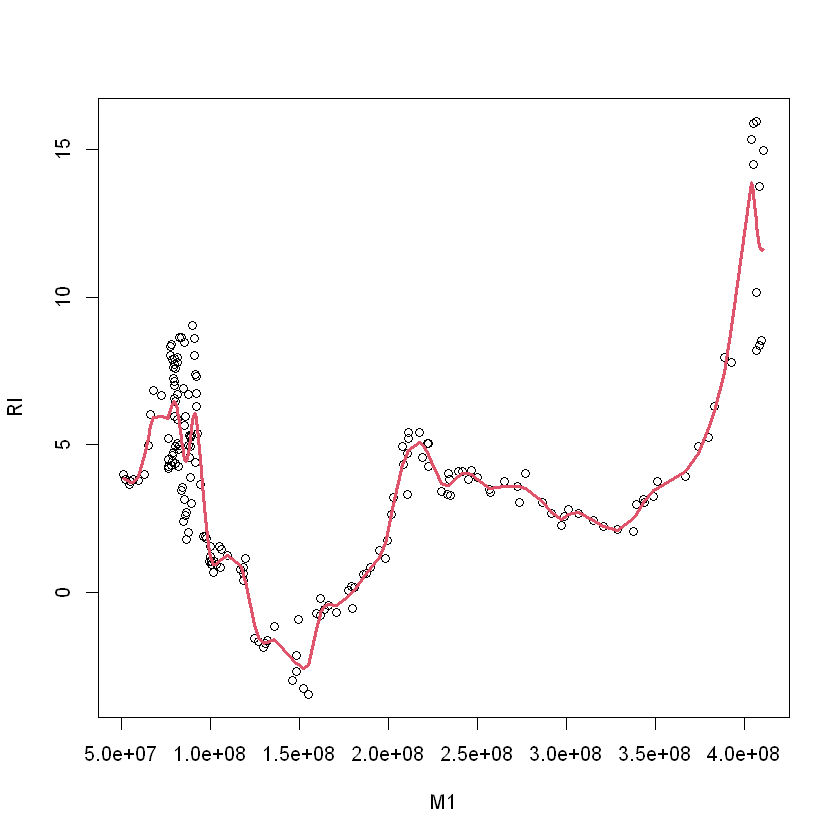

In [12]:
plot(RI~M1,data=train_data, xlab="M1",ylab="RI")
lines(smooth.spline(train_data$M1,train_data$RI),col=2,lwd=3)

In [13]:
model <- RI~.
fit <- lm(model, train_data)
summary(fit)


Call:
lm(formula = model, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7570 -1.3348 -0.2357  0.8762  4.3557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.847e+01  1.123e+01  -5.206 5.23e-07 ***
Data         3.833e-08  1.019e-08   3.759  0.00023 ***
RPM          2.009e+00  4.696e-01   4.279 3.05e-05 ***
R_CRED       5.282e-01  2.704e-01   1.953  0.05234 .  
R_DEP       -8.087e-01  2.480e-01  -3.261  0.00133 ** 
EUR         -1.206e+00  1.337e+00  -0.902  0.36807    
SN          -4.817e-04  1.558e-03  -0.309  0.75760    
RSBIM_15_74  1.768e-01  1.956e-01   0.904  0.36724    
M1           1.416e-08  8.267e-09   1.712  0.08854 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.753 on 180 degrees of freedom
Multiple R-squared:  0.7548,	Adjusted R-squared:  0.7439 
F-statistic: 69.25 on 8 and 180 DF,  p-value: < 2.2e-16


In [14]:
step_model <- stepAIC(fit, trace = TRUE, direction= "both")

Start:  AIC=221.03
RI ~ Data + RPM + R_CRED + R_DEP + EUR + SN + RSBIM_15_74 + M1

              Df Sum of Sq    RSS    AIC
- SN           1     0.294 553.63 219.13
- EUR          1     2.503 555.84 219.88
- RSBIM_15_74  1     2.512 555.84 219.88
<none>                     553.33 221.03
- M1           1     9.015 562.35 222.08
- R_CRED       1    11.728 565.06 222.99
- R_DEP        1    32.685 586.02 229.87
- Data         1    43.448 596.78 233.31
- RPM          1    56.278 609.61 237.33

Step:  AIC=219.13
RI ~ Data + RPM + R_CRED + R_DEP + EUR + RSBIM_15_74 + M1

              Df Sum of Sq    RSS    AIC
- EUR          1     2.971 556.60 218.14
- RSBIM_15_74  1     3.631 557.26 218.36
<none>                     553.63 219.13
- R_CRED       1    11.475 565.10 221.00
+ SN           1     0.294 553.33 221.03
- M1           1    15.828 569.45 222.45
- R_DEP        1    33.265 586.89 228.15
- Data         1    53.032 606.66 234.41
- RPM          1    56.488 610.11 235.49

Step:  AIC=218.14


In [15]:
summary(step_model)



Call:
lm(formula = RI ~ Data + RPM + R_CRED + R_DEP + M1, data = train_data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.696 -1.252 -0.344  0.972  4.541 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.315e+01  8.356e+00  -6.361 1.56e-09 ***
Data         3.133e-08  5.763e-09   5.436 1.72e-07 ***
RPM          1.809e+00  4.307e-01   4.201 4.15e-05 ***
R_CRED       6.127e-01  2.409e-01   2.543  0.01183 *  
R_DEP       -8.012e-01  2.455e-01  -3.263  0.00132 ** 
M1           1.290e-08  4.371e-09   2.950  0.00359 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.745 on 183 degrees of freedom
Multiple R-squared:  0.7529,	Adjusted R-squared:  0.7462 
F-statistic: 111.5 on 5 and 183 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 152.6, df = 10, p-value < 2.2e-16


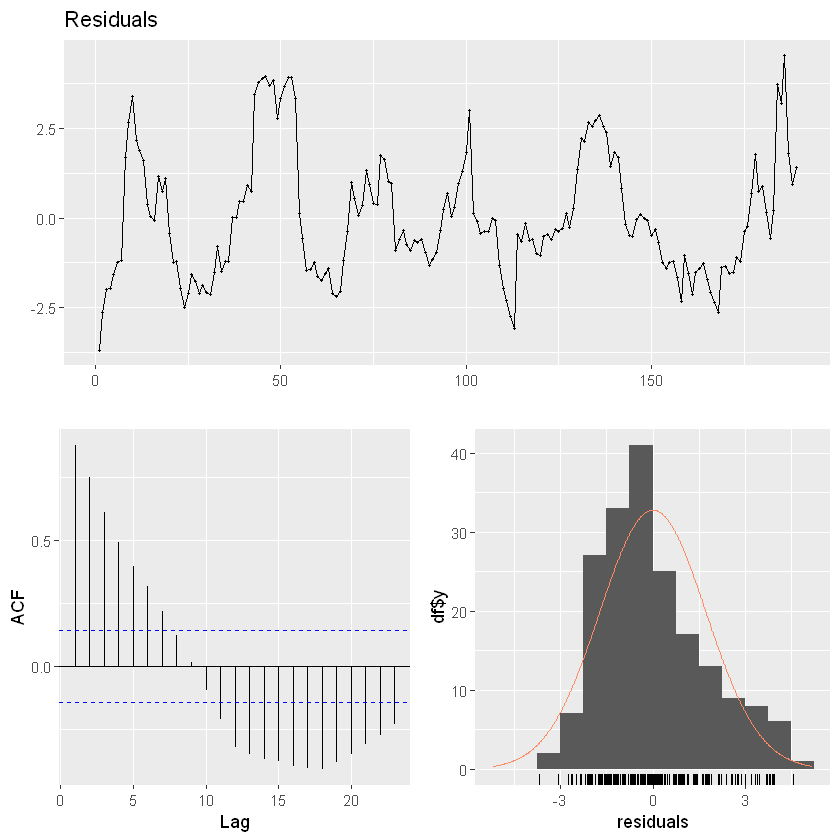

In [16]:
checkresiduals(step_model)

In [17]:
residual = residuals(step_model)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 14.174, df = 2, p-value = 0.000836


In [18]:
Box.test(residual, lag = 1, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 147.89, df = 1, p-value < 2.2e-16


In [19]:
white.test(residual)

ERROR: Error in as.matrix(y): argument "y" is missing, with no default


In [20]:
# Install and load the segmented package
#install.packages("segmented")
library(segmented)

# Fit a segmented regression model
fit <- segmented(lm(RI ~ SN, data = train_data), seg.Z = ~ SN)

# Print the summary of the segmented regression model
summary(fit)

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:forecast':

    getResponse





	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = lm(RI ~ SN, data = train_data), seg.Z = ~SN)

Estimated Break-Point(s):
         Est. St.Err
psi1.SN 2063 54.138

Meaningful coefficients of the linear terms:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.0861930  1.3768181  12.410   <2e-16 ***
SN          -0.0087527  0.0009105  -9.613   <2e-16 ***
U1.SN        0.0140966  0.0010219  13.795       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.346 on 185 degrees of freedom
Multiple R-Squared: 0.5489,  Adjusted R-squared: 0.5416 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 2 iterations (rel. change 1.5259e-08)

In [23]:
library(segmented)

# Fit a segmented regression model
fit <- segmented(lm(RI ~  SN + M1, data = train_data), 
                 seg.Z = ~  SN + M1)

# Print the summary of the segmented regression model
summary(fit)


	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = lm(RI ~ SN + M1, data = train_data), seg.Z = ~SN + 
    M1)

Estimated Break-Point(s):
                 Est.      St.Err
psi1.SN     1951.815      34.817
psi1.M1 77892830.603 2269625.873

Meaningful coefficients of the linear terms:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.657e+00  3.469e+00  -0.766    0.445    
SN          -1.370e-02  1.277e-03 -10.732  < 2e-16 ***
M1           3.567e-07  5.785e-08   6.167 4.39e-09 ***
U1.SN        1.948e-02  1.321e-03  14.753       NA    
U1.M1       -3.590e-07  5.636e-08  -6.370       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.03 on 182 degrees of freedom
Multiple R-Squared: 0.6677,  Adjusted R-squared: 0.6568 

Boot restarting based on 6 samples. Last fit:
Convergence attained in 4 iterations (rel. change -9.9653e-09)

In [24]:
# Install and load the 'vars' package
install.packages("vars")
library(vars)

# Calculate log likelihood
log_likelihood <- logLik(fit)

# Calculate AIC and BIC
num_params <- length(coef(fit))  # Number of parameters in the model
num_obs <- nrow(train_data)  # Number of observations in the data set

AIC <- -2 * log_likelihood + 2 * num_params
BIC <- -2 * log_likelihood + num_params * log(num_obs)

# Print the results
print(log_likelihood)
print(AIC)
print(BIC)


Installing package into 'C:/Users/Zoe/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'vars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Zoe\AppData\Local\Temp\RtmpYfxOHL\downloaded_packages


Loading required package: strucchange

Loading required package: sandwich

Loading required package: urca



'log Lik.' -398.402 (df=8)
'log Lik.' 810.804 (df=8)
'log Lik.' 833.4962 (df=8)



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 154.69, df = 10, p-value < 2.2e-16


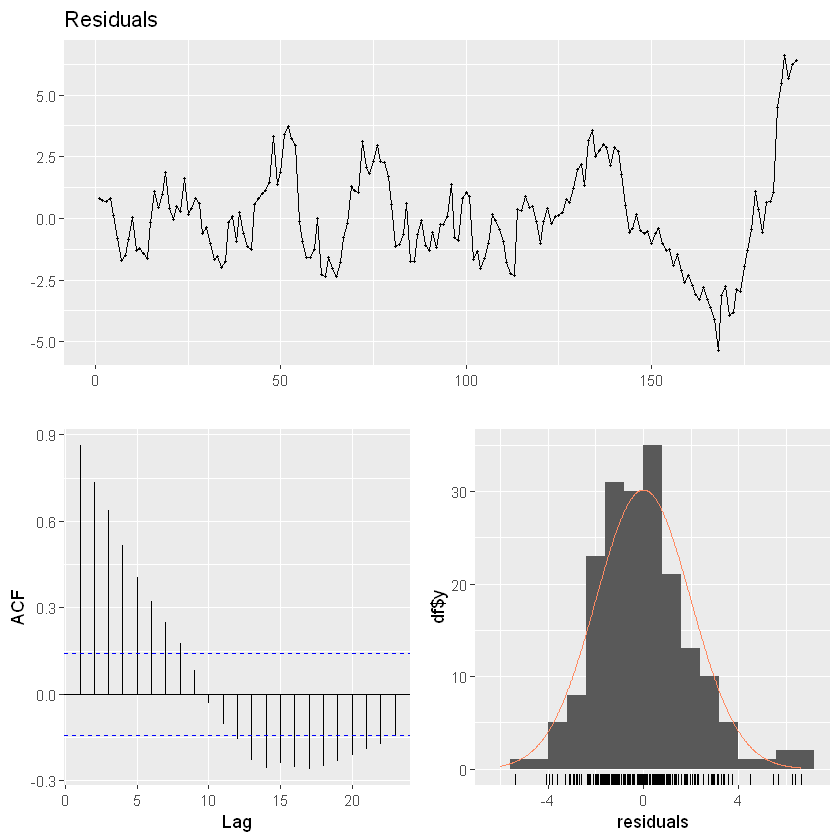

In [24]:
checkresiduals(fit)

In [25]:
residual = residuals(fit)
jarque.bera.test(residual)


	Jarque Bera Test

data:  residual
X-squared = 21.454, df = 2, p-value = 2.195e-05


In [26]:
white_test <- bptest(fit)
white_test


	studentized Breusch-Pagan test

data:  fit
BP = 65.236, df = 6, p-value = 3.86e-12


In [27]:
Box.test(residual, lag = 4, type = "Ljung-Box")


	Box-Ljung test

data:  residual
X-squared = 378.63, df = 4, p-value < 2.2e-16


In [28]:
# Predict the response variable using the fitted model
predictions <- predict(fit, newdata = test_data)

# View the predicted values
print(predictions)


        1         2         3         4         5         6         7 
 9.522847 10.310711 11.776763 10.963680 11.056944 12.716310 12.716989 


In [29]:
y_test <- test_data$RI
Erori1 = predictions - y_test

In [30]:
ME <- mean(Erori1)
ME

[1] -3.676537

In [31]:
RMSE <- sqrt(mean(Erori1^2))
RMSE

[1] 4.44939

In [32]:
MAE <- mean(abs(Erori1))
MAE

[1] 4.101391

In [33]:
MPE <- mean(Erori1/y_test) * 100
MPE

[1] -22.80369

In [34]:
MAPE <- mean(abs(Erori1 / y_test)) * 100
MAPE

[1] 26.58689

In [35]:
naive_error_mean <- 3.10
MASE <- mean(abs(Erori1)) / naive_error_mean
MASE

[1] 1.323029

, , 1

            [,1]
[1,]  1.00000000
[2,]  0.39369942
[3,] -0.02286525
[4,] -0.01898588
[5,] -0.18722740
[6,] -0.41553986
[7,] -0.24908104

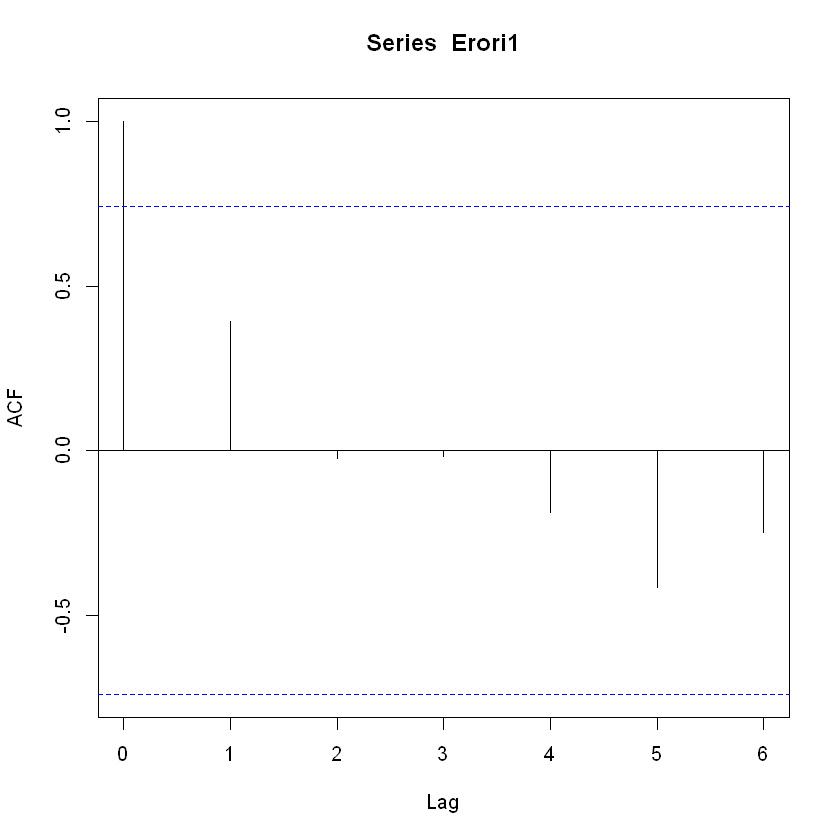

In [36]:
acf_values <- acf(Erori1)
acf_values$acf

In [37]:
smooth.spline = smooth.spline(train_data$M1, train_data$RI)
predictions = predict(smooth.spline, x=test_data$M1)
print(predictions$y)

[1] 12.610804  7.885399 12.754363  7.930365  7.801952  5.969888  5.918201


In [38]:
smooth.spline = smooth.spline(train_data$SN, train_data$RI)
predictions = predict(smooth.spline, x=test_data$SN)
print(predictions$y)

[1] 15.63790 20.13008 28.81045 23.94674 24.48715 34.07947 34.07947


In [39]:
smooth.spline = smooth.spline(train_data$EUR, train_data$RI)
predictions = predict(smooth.spline, x=test_data$EUR)
print(predictions$y)

[1]  5.047789 12.601117  5.489057  5.267779 15.600014  4.922561 13.287422


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


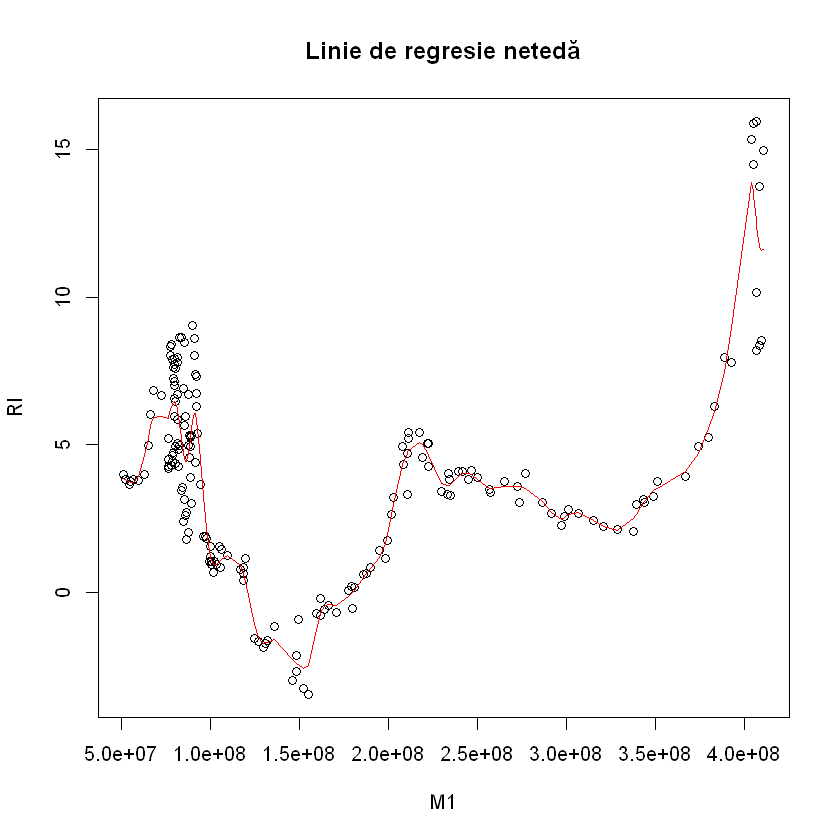

In [40]:
# Calculați modelul de regresie netedă
smooth.spline_model <- smooth.spline(train_data$M1, train_data$RI)

# Obțineți predictiile pentru setul de test
predictions <- predict(smooth.spline_model, x = test_data$M1)

# Vizualizați rezultatele
plot(train_data$M1, train_data$RI, main = "Linie de regresie netedă", xlab = "M1", ylab = "RI")
lines(smooth.spline_model, col = "red")
points(test_data$M1, predictions, col = "blue", pch = 16)
legend("topleft", legend = c("Date de antrenament", "Linie de regresie netedă", "Date de test", "Predictii"),
       col = c("black", "red", "black", "blue"), pch = c(1, NA, NA, 16), lty = c(NA, 1, NA, NA))


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


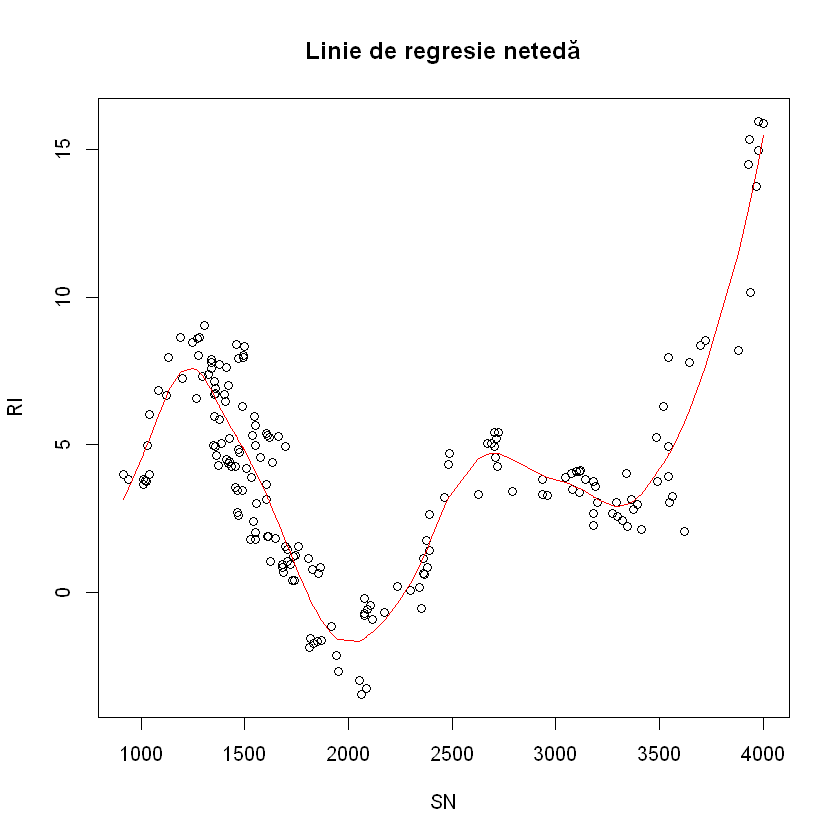

In [43]:
# Calculați modelul de regresie netedă
smooth.spline_model <- smooth.spline(train_data$SN, train_data$RI)

# Obțineți predictiile pentru setul de test
predictions <- predict(smooth.spline_model, x = test_data$SN)

# Vizualizați rezultatele
plot(train_data$SN, train_data$RI, main = "Linie de regresie netedă", xlab = "SN", ylab = "RI")
lines(smooth.spline_model, col = "red")
points(test_data$M1, predictions, col = "blue", pch = 16)
legend("topleft", legend = c("Date de antrenament", "Linie de regresie netedă", "Date de test", "Predictii"),
       col = c("black", "red", "black", "blue"), pch = c(1, NA, NA, 16), lty = c(NA, 1, NA, NA))
